# MBTI Prediction

# 1 - Data Preprocessing

## 1.0. Data Collection

In [ ]:
# First upload kaggle.json from kaggle account in your to MyDrive (Google Drive)
from google.colab import drive
drive.mount('/content/drive')
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download -d datasnaek/mbti-type
! unzip mbti-type.zip

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 37% 9.00M/24.4M [00:00<00:00, 47.4MB/s]
100% 24.4M/24.4M [00:00<00:00, 104MB/s] 
Archive:  mbti-type.zip
  inflating: mbti_1.csv              


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Training testing 90-10 split
data = pd.read_csv("mbti_1.csv")
training_data, testing_data = train_test_split(data, test_size=0.1, shuffle=False)

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0}".format(training_data.iloc[-1,0]))
print("SENTENCE: {0}".format(training_data.iloc[-1,1]))
print("------------------------------------")

------------------------------------
Size of training dataset: 7807
Size of testing dataset: 868
------------------------------------
------------------------------------
Sample Data
LABEL: INTP
SENTENCE: 'Piano has joined my list too.|||When you are asked to add smileys into your text messages(when you reply to one (I do not usually send text messages)).. :laughing:|||My Desktop:   ScreenShot 1:  35109 ScreenShot 2: 35110|||One of my friends had told me, 'you can be a really good actor'.  I think an INTPs life is like a musical performance, you have to sit through the long overtures, to get to the substantial/quality...|||Anyone wish they weren't INTP? Definitely not.  But, sometimes I do wish I can get along very nicely with somebody other than my computer. By that, I mean a girl. But, that phase passes off...|||Can you say same things for yourself? An absolute yes.  How you deal with it? tried doing what they wanted me to do for sometime. It was too draining. Now, I do not even both

In [ ]:
training_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## 1.1. Data Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_class_distribution(data, x="type", figsize=(16,4), title="Distrubtion of MBTI Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette, order = data[x].value_counts().index)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Count of Users", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

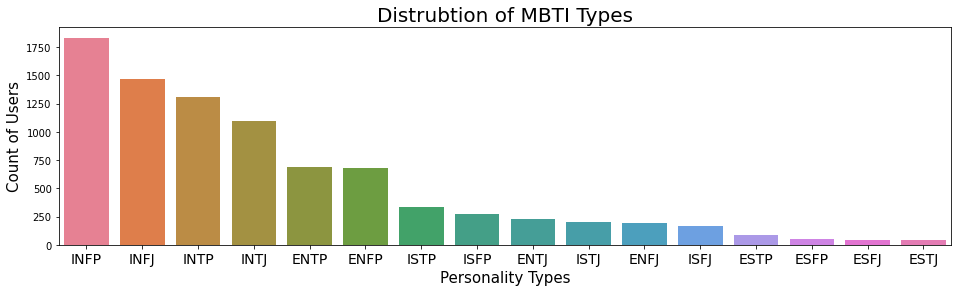

In [ ]:
show_class_distribution(data, xticks_size=14)

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = "1RFTC4Ft1rA9p91TKXCmpmiYQIkEhrJGt"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MBTI_population.csv') 
MBTI_population = pd.read_csv("/content/MBTI_population.csv")

In [ ]:
MBTI_population

,Personality Type,Frequency in Population (%)
0,ISFJ,0.138
1,ESFJ,0.123
2,ISTJ,0.116
3,ISFP,0.088
4,ESTJ,0.087
5,ESFP,0.085
6,ENFP,0.081
7,ISTP,0.054
8,INFP,0.044
9,ESTP,0.043


In [ ]:
MBTI_population["expected"] = MBTI_population[" Frequency in Population  (%)"].apply(lambda x: x*len(data))
del MBTI_population[" Frequency in Population  (%)"]

In [ ]:
MBTI_population

,Personality Type,expected
0,ISFJ,1197.150
1,ESFJ,1067.025
2,ISTJ,1006.300
3,ISFP,763.400
4,ESTJ,754.725
5,ESFP,737.375
6,ENFP,702.675
7,ISTP,468.450
8,INFP,381.700
9,ESTP,373.025


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


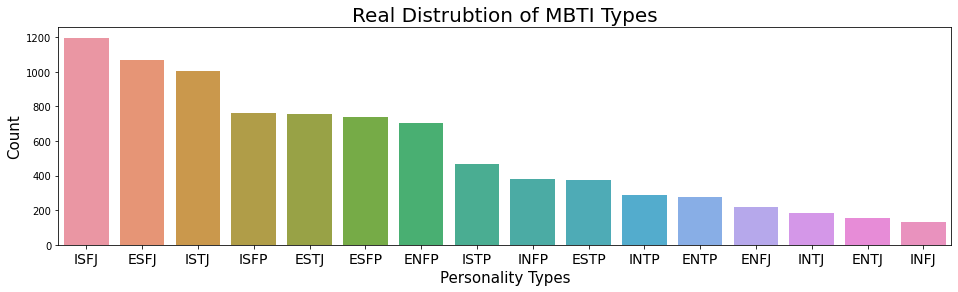

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(MBTI_population["Personality Type"],MBTI_population["expected"])
plt.xlabel("Personality Types", size=15)
plt.ylabel("Count", size=15)
plt.xticks(size=14)
plt.title("Real Distrubtion of MBTI Types", size=20)
plt.show()

In [ ]:
# Reorder the original to compare to expected on the plot
original_count = data["type"].value_counts().rename_axis('type').reset_index(name='counts')
original_count = original_count.set_index("type")
original_count = original_count.reindex(index=MBTI_population["Personality Type"])
original_count = original_count.reset_index()

In [ ]:
original_count

,Personality Type,counts
0,ISFJ,166
1,ESFJ,42
2,ISTJ,205
3,ISFP,271
4,ESTJ,39
5,ESFP,48
6,ENFP,675
7,ISTP,337
8,INFP,1832
9,ESTP,89


In [ ]:
MBTI_population

,Personality Type,expected
0,ISFJ,1197.150
1,ESFJ,1067.025
2,ISTJ,1006.300
3,ISFP,763.400
4,ESTJ,754.725
5,ESFP,737.375
6,ENFP,702.675
7,ISTP,468.450
8,INFP,381.700
9,ESTP,373.025


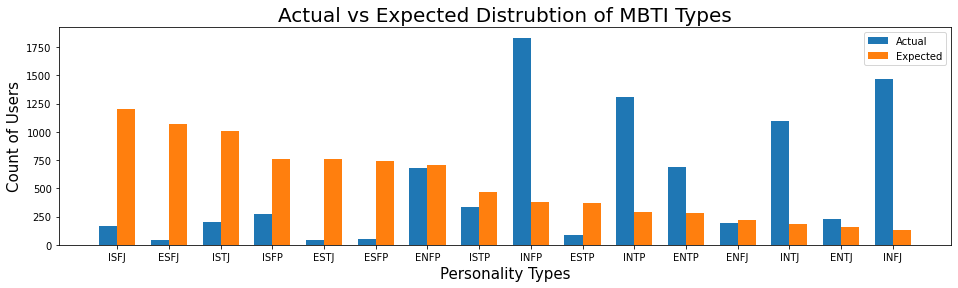

In [ ]:
import numpy as np
index = np.arange(16)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(16,4))
original = ax.bar(index, original_count["counts"], bar_width,
                label="Actual")
expected = ax.bar(index+bar_width, MBTI_population["expected"],
                 bar_width, label="Expected")
ax.set_xlabel("Personality Types", size=15)
ax.set_ylabel("Count of Users", size=15)
ax.set_title("Actual vs Expected Distrubtion of MBTI Types",  size=20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(MBTI_population["Personality Type"].tolist())
ax.legend()

In [ ]:
def convert_type(text, key, opposite_key):
  if key in text:
    return key
  elif opposite_key in text:
    return opposite_key
    
def extract_key(key, opposite_key):
  column_name = key + "-" + opposite_key
  MBTI_population[column_name] = MBTI_population["Personality Type"].apply(lambda x: convert_type(x, key, opposite_key))
  original_count[column_name] = original_count["Personality Type"].apply(lambda x: convert_type(x, key, opposite_key))
  
  expected = MBTI_population.groupby(column_name).sum()
  expected = expected.groupby(column_name).sum()
  expected = expected.reset_index(level=0)

  actual = original_count.groupby(column_name).sum()
  actual = actual.groupby(column_name).sum()
  actual = actual.reset_index(level=0)
  return expected, actual

In [ ]:
expected_EI, actual_E1 = extract_key("I", "E")
expected_NS, actual_NS = extract_key("N", "S")
expected_TF, actual_TF = extract_key("T", "F")
expected_JP, actual_JP = extract_key("J", "P")

In [ ]:
expected_JP

,J-P,expected
0,J,4710.525
1,P,3990.500


In [ ]:
actual_JP

,J-P,counts
0,J,3434
1,P,5241


In [ ]:
MBTI_population

,Personality Type,expected,I-E,N-S,T-F,J-P
0,ISFJ,1197.150,I,S,F,J
1,ESFJ,1067.025,E,S,F,J
2,ISTJ,1006.300,I,S,T,J
3,ISFP,763.400,I,S,F,P
4,ESTJ,754.725,E,S,T,J
5,ESFP,737.375,E,S,F,P
6,ENFP,702.675,E,N,F,P
7,ISTP,468.450,I,S,T,P
8,INFP,381.700,I,N,F,P
9,ESTP,373.025,E,S,T,P


In [ ]:
def show_subplot(expected, actual,title, axs=None):
    axs = axs or plt.gca()
    index = np.arange(2)
    bar_width = 0.35
    axs.bar(index, actual["counts"], bar_width,
                    label="Actual")
    axs.bar(index+bar_width, expected["expected"],
                    bar_width, label="Expected")
    axs.set_xticks(index + bar_width / 2)
    axs.set_xticklabels(expected[expected.columns[0]].tolist())
    axs.set_title(title, size=20)
    return axs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  


Text(0.04, 0.5, 'Count of Users')

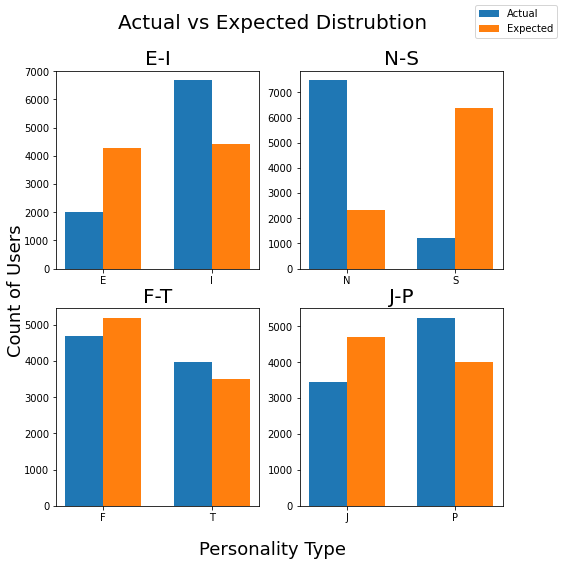

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
show_subplot(expected_EI, actual_E1, axs=axs[0, 0], title="E-I")
show_subplot(expected_NS, actual_NS, axs=axs[0, 1], title="N-S")
show_subplot(expected_TF, actual_TF, axs=axs[1, 0], title="F-T")
show_subplot(expected_JP, actual_JP, axs=axs[1, 1], title= "J-P")
fig.suptitle("Actual vs Expected Distrubtion",  size=20)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='best')
fig.text(0.5, 0.04, "Personality Type", ha='center', fontsize=18)
fig.text(0.04, 0.5, "Count of Users", va='center', rotation='vertical', fontsize=18)

## 1.2. Preprocess data

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 15.9 MB/s 
     |████████████████████████████████| 106 kB 41.9 MB/s 


In [ ]:
# This can take some time to run
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
sww = sw.words()

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def apply_lemmatization(text): return [wnl.lemmatize(w) for w in text]

def clean_posts(df, old_column = "posts", column_name = "cleaned_post"):
  df[column_name] = df[old_column].apply(lambda x: contractions.fix(x))
  df[column_name] = df[column_name].apply(lambda x: x.lower())
  df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
  df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
  df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
  df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
  df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
  pattern = re.compile(r'\b({})\b'.format('|'.join(sww)))
  df[column_name] = df[column_name].apply(lambda x: re.sub('\s+', ' ', re.sub(pattern, '', x)).strip())
  df[column_name] = df[column_name].apply(lambda x: word_tokenize(x))
  # df[column_name] = df[column_name].apply(apply_lemmatization)
  return df

training_data = clean_posts(training_data)
testing_data = clean_posts(testing_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Before cleaning
training_data.loc[5, "posts"]

"'18/37 @.@|||Science  is not perfect. No scientist claims that it is, or that scientific  information will not be revised as we discover new things.  Rational  thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't...|||Lets get this party started  66314|||I did not say it disproved God. I merely said that I found such methods disturbing. Although, it does bring up certain questions. God is in control of the universe, and the governments of the world,...|||Surprisingly, I could not find a thread about this on perc even with Google. So, here you go.  Watch Jesus Camp online - Watch Movies Online, Full Movies, Download  I was disturbed watching this...|||A metaphysical gun (Hell) held to someone's head can be just as effective as an actual

In [ ]:
# After cleaning
' '.join(training_data.loc[5, "cleaned_post"])

'science perfect scientist claims scientific information revised discover things rational society infp edgar poe infp siggy obvious quick put infp agree isfp compare haku definite infp flat naruto party started disproved god found methods disturbing bring questions god control universe governments world surprisingly find thread perc google watch jesus camp online watch movies online full movies download disturbed watching metaphysical gun hell held head effective actual gun find methods disturbing watch jesus camp online watch movies online full movies unstable word pretty emotionally flat lined deal emotions high school feelings attraction wedding dipped chocolate fountain ate dipped fruit fish hershey kisses drank jars honey post quoted half years ago explanation intps externally intjs internally deal infp relationship tempted avoid hurting means fudging truth telling hear heard watch loooot anime animedreaming tv member anime board legs nice expression wrong private sad evil grin b 

In [ ]:
# Extract the labels and posts and store into List

# Get the lists of data (posts)
training_posts=training_data['cleaned_post'].tolist()
testing_posts=testing_data['cleaned_post'].tolist()

# Get the list of corresponding labels for the data (posts)
training_labels=training_data['type'].tolist()
testing_labels=testing_data['type'].tolist()

In [ ]:
# Change 16 Types into 2 Types e.g. INTJ -> T, INFJ -> F
def convert_class(label_list):
  for i in range(len(label_list)):
    if "T" in label_list[i]:
      label_list[i] = "T"
    elif "F" in label_list[i]:
      label_list[i] = "F"
  return label_list

training_labels = convert_class(training_labels)
testing_labels = convert_class(testing_labels)

# 2 - Input Representation


## 2.1. Word Embedding Construction

In [ ]:
from gensim.models import Word2Vec
from gensim.models import FastText

# Build best training model and parameters for word embeddings
word_emb_model = FastText(sentences=training_posts, size=100, window=5, min_count=5, workers=2, sg=1)

## 2.2. Pretrained Word Embedding


In [ ]:
# Download the best Pre-trained Embedding
import gensim.downloader as api
word_emb_model2 = api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


## 2.3. Input Concatenation

In [ ]:
# Use the two trained embeddings and concatenate them in the lookup table
# Then use the concatenated embeddings to represent each word in the sentence.

# Get the vocabulary list from the training data for creating the lookup table later
word_set = set() 
for sent in training_posts:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()

# Creating the word index set
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

In [ ]:
import numpy as np
emb_dim = word_emb_model.vector_size + word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model and word in word_emb_model2:
      emb_table.append(np.concatenate((word_emb_model[word],word_emb_model2[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

In [ ]:
# Find max sequence length
len_list = [len(s) for s in training_posts]
seq_length = max(len_list)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts, seq_length, word_index)
test_pad_encoded = encode_and_add_padding(testing_posts, seq_length, word_index)

# LabelEncoder can help us encode target labels with a value between 0 and n_classes-1.
from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
# Encode the labels 0=F, 1=T
label_train_encoded = lEnc.fit_transform(training_labels)
label_test_encoded = lEnc.transform(testing_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


# 3 - Bi-LSTM Training

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creating automatic batches
from torch.utils.data import TensorDataset
train_data = TensorDataset(torch.from_numpy(np.array(train_pad_encoded)), torch.from_numpy(np.array(label_train_encoded)))

from torch.utils.data import DataLoader
batch_size = 1500
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True) 

# Setup for the modeling and training
vocab_size = len(word_list)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 30

# Set hyperparameters
learning_rate = 0.01
total_epoch = 15

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input

for epoch in range(total_epoch):  
    for sentence,targets in train_loader:
        input_torch = torch.from_numpy(np.array(sentence)).to(device)
        target_torch = torch.from_numpy(np.array(targets)).view(-1).to(device)
        # Set the flag to training
        model.train()
        
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(input_torch) 
        loss = criterion(outputs, target_torch)
        loss.backward()
        optimizer.step()
        
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')

Epoch: 1, loss: 0.69157, train_acc: 0.56
Epoch: 2, loss: 0.64290, train_acc: 0.62
Epoch: 3, loss: 0.59776, train_acc: 0.67
Epoch: 4, loss: 0.66052, train_acc: 0.56
Epoch: 5, loss: 0.65018, train_acc: 0.65
Epoch: 6, loss: 0.66304, train_acc: 0.62
Epoch: 7, loss: 0.56721, train_acc: 0.71
Epoch: 8, loss: 0.53994, train_acc: 0.73
Epoch: 9, loss: 0.55724, train_acc: 0.75
Epoch: 10, loss: 0.56955, train_acc: 0.76
Epoch: 11, loss: 0.49989, train_acc: 0.79
Epoch: 12, loss: 0.43205, train_acc: 0.84
Epoch: 13, loss: 0.44620, train_acc: 0.80
Epoch: 14, loss: 0.41894, train_acc: 0.82
Epoch: 15, loss: 0.35122, train_acc: 0.86
Finished Training


In [ ]:
model.eval()

input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       468
           1       0.78      0.85      0.81       400

    accuracy                           0.82       868
   macro avg       0.82      0.82      0.82       868
weighted avg       0.82      0.82      0.82       868



# 4 - Predicting One Example

In [ ]:
def predict_personality(text):
  # Pre-process text
  for string in [text]:
    # Remove URL/Punctuation
    string = re.sub(r'http\S+', "", string)
    sentence = re.sub(r"[^a-z]+", " ", string.lower())

  # Tokenise text
  sentence = word_tokenize(sentence)

  # Remove stopwords
  sww = sw.words()
  sentence = [w for w in sentence if not w in sww]

  temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sentence]
  if len(temp_encoded) < seq_length:
      temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
  text_pad_encoded = temp_encoded

  input_torch = torch.from_numpy(np.array([text_pad_encoded])).to(device)

  outputs = model(input_torch) 
  predicted = torch.argmax(outputs, -1)

  if predicted.item() == 1:
    pred = "T"
  elif predicted.item() == 0:
    pred = "F"
  result = "Predicted Personality Type: " + pred
  return result

## 4.1 Feeling Example

In [ ]:
testing_data.loc[7810, "posts"]

"'As an ENFJ, how ambitious are you? I am fairly ambitious. I have two undergrad degrees; Sociology/Religious Studies & in Education in ESL/Secondary Education. I left about a 3 year gap between both...|||Welcome!  I find that writing my thoughts in free-flow about the situation helps me cope with separating my feelings with the other person. I also remind myself that I will not allow another...|||healthy ways - workout regularly, yoga, talk to my boyfriend/friends. Maintain a regular sleep schedule.  unhealthy - chocolate. more chocolate. Sometimes other unhealthy foods :/|||It is going excellent! Are relationship is building an amazing foundation. We love to express our feelings for each other through poetry (my preference), through drawings & art (his preference). We...|||Hey INFPs - barely post anymore. I just wanted to share that I met my INFP boyfriend on Feb. 4th of this year. We met through a dating app. We have never been more in love - we've both described our...|||It's been 

In [ ]:
testing_data.loc[7810, "type"]

'ENFJ'

In [ ]:
predict_personality(testing_data.loc[7810, "posts"])

'Predicted Personality Type: F'

## 4.2 Thinking Example

In [ ]:
testing_data.loc[7812, "posts"]

"'Only the best video game soundtrack ever   https://www.youtube.com/watch?v=4wEZv3cwoMs|||I too find war a fascinating subject to study and observe, but I'd never join an army because I believe the government abuses their power over you even more if you do. They may pay you slightly more...|||I like to cook. I think it's fun to learn new recipes and change them to my tastes, plus I find that if you put some effort into preparing your food, it appears to taste better. That being said, I do...|||I don't see the point in visiting the grave of a loved one, though I've visited graveyards because it can conjure a pensive mood in regards to death and loss.|||Has anyone really been far even as decided to use even go want to do look more like?|||Your mom.  Something you're likely to find in Africa.|||I can definitely relate to your story. It can be really hard to stay motivated when you feel misunderstood.  First off, drop the medication. It has side effects which will make you feel shittier..

In [ ]:
testing_data.loc[7812, "type"]

'INTP'

In [ ]:
predict_personality(testing_data.loc[7812, "posts"])

'Predicted Personality Type: T'

# 5 - Test with any text

In [ ]:
#@title Personality Type Prediction
text = "I am an INFJ because I feel everything deeply." #@param {type:"string"}

predict_personality(text)

'Predicted Personality Type: F'